In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
dataset = pd.read_csv('tripadvisor_hotel_reviews.csv', sep =',', quoting = 2)

In [4]:
dataset.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [7]:
#taking only 5 and 1 star reviews into consideration
dataset = dataset[(dataset['Rating'] == 1) | (dataset['Rating'] == 5)]

In [9]:
dataset.head()

,Review,Rating
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
5,love monaco staff husband stayed hotel crazy w...,5.0
6,"cozy stay rainy city, husband spent 7 nights m...",5.0
8,"hotel stayed hotel monaco cruise, rooms genero...",5.0


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10475 entries, 0 to 10474
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   10475 non-null  int64  
 1   Review  10475 non-null  object 
 2   Rating  10475 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 245.6+ KB


In [15]:
#setting the indexes for new dataset
dataset.reset_index(inplace= True)

In [17]:
#stemming the text and removing stopwords
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0,10475):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    all_stopwords.remove('no')  
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [34]:
#checking out a random review
print(corpus[888])

great famili arriv sf car famili arriv minivan day sf book room base abl two room suit gener excel review hotel receiv guidebook stay hotel del sol exceed high expect way longer better like downgrad hotel expect not e posh hotel place middl walkabl tourist area w room resembl hampton qualiti inn pretend none need use forum regist minor beef peopl absorb normal hassl travel esp famili said experi w four peopl gener feel hotel realli nice citi safe instead courtyard make thing overli noisi familiar expect ground outsid came feel familiar homey children not urban savvi kid nice citi not spend time watch back union squar fisherman wharf locat lot european travel stay understand arriv countri reassur place locat land fabul place walk eat block north south fast food taco bell colonel chicken w block small groceri store block away citi best safeway block away best run rout right door marina gg bridg sf marathon goe rout park block away easi car access bridg golden gate park rest citi inclin d

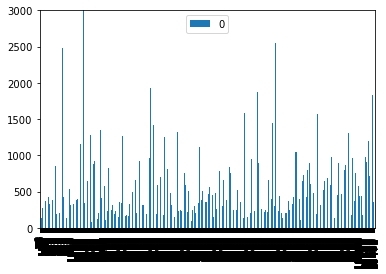

In [35]:
#checking how long the reviews are
import seaborn as sns
lengths = []
for item in corpus:
    lengths.append(len(item))
lengths_df = pd.DataFrame(lengths)
lengths_df.plot(kind='bar', ylim=(0,3000))
#decided not to drop any in the end

In [24]:
#vectorizing words into features
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
#setting vectorized features as features matrix X and rating as y
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [25]:
#splitting the dataset into test set and training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
# Training the SVM model on the training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the confusion matrix and counting the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[ 343   94]
 [  10 2696]]


0.9669105949729557